In [14]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
df = pd.read_excel('libor 3month version to use.xls',sheetname='data to use',index_col='Date')

In [16]:
df = df.dropna()

In [36]:
df_forecast = df.loc['20090101':'20091231',:]

In [37]:
len(df_forecast)

253

In [18]:
df = df.loc['20070101':'20081231',:]

In [39]:
df.to_excel('Results/in-sample.xls')

Stationary Check

In [6]:
from statsmodels.tsa.stattools import adfuller

In [7]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    with open("Results\ADF.txt", "w") as text_file:
        print(dfoutput, file=text_file)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


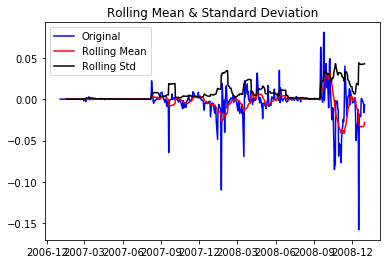

Results of Dickey-Fuller Test:
Test Statistic                  -5.145614
p-value                          0.000011
#Lags Used                      19.000000
Number of Observations Used    487.000000
Critical Value (1%)             -3.443849
Critical Value (5%)             -2.867493
Critical Value (10%)            -2.569941
dtype: float64


In [8]:
test_stationarity(df['Return'])

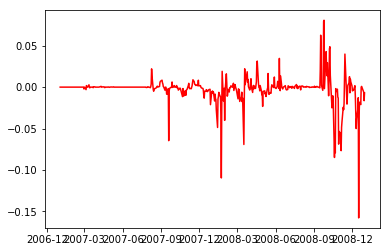

In [9]:
plt.plot(df['Return'],'r')
plt.savefig('Results/plot-0709.png',dpi=2000)

Autocorrelation

In [39]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

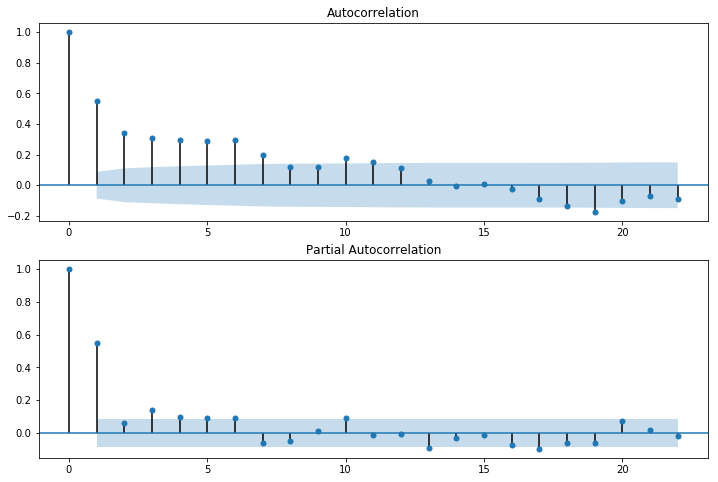

In [40]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Return'].dropna(),lags=22,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Return'].dropna(),lags=22,ax=ax2)
fig.savefig('Results/acf22-0709.png',dpi=2000)

ARMA

In [9]:
p_max=7
q_max=7

In [10]:
p_list = []
q_list = []
AIC_list = []
BIC_list = []

In [11]:
minAIC = 0
minBIC = 0
pminAIC = 0
pminBIC = 0
qminAIC = 0
qminBIC = 0

In [12]:
import statsmodels

In [13]:
#warnings.filterwarnings('ignore')
for p in range (0,p_max):
    for q in range (0,q_max):
        try:
            model = statsmodels.tsa.arima_model.ARIMA(df['Return'],order=(p,2,q))
            results = model.fit(maxiter=1000)
            p_list.append(p)
            q_list.append(q)
            AIC_list.append(results.aic)
            BIC_list.append(results.bic)
            if minAIC>results.aic:
                minAIC = results.aic
                pminAIC = p
                qminAIC = q
            if minBIC>results.bic:
                minBIC = results.bic
                pminBIC = p
                qminBIC = q
        except:
            continue

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [34]:
results = {'p':p_list,'q':q_list,'AIC':AIC_list,'BIC':BIC_list}

In [35]:
models = pd.DataFrame(data=results)

In [36]:
models['AIC'] = models['AIC']/len(df)

In [37]:
models['BIC'] = models['BIC']/len(df)

In [38]:
models

,AIC,BIC,p,q
0,-4.442728,-4.426063,0,0
1,-5.359008,-5.334011,0,1
2,-4.774104,-4.749107,1,0
3,-5.586698,-5.528370,1,4
4,-5.570523,-5.503864,1,5
5,-5.575353,-5.500361,1,6
6,-4.985054,-4.951724,2,0
7,-5.568592,-5.493600,2,5
8,-5.571855,-5.488530,2,6
9,-5.110253,-5.068590,3,0


In [22]:
models.to_excel('Results/models0709.xls')

In [23]:
Str_conclusion = 'According to AIC, the minimum AIC value is '+str(minAIC)+' at p='+str(pminAIC)+' and q='+str(qminAIC)+'.\n'+'According to BIC, the minimum BIC value is '+str(minBIC)+' at p='+str(pminBIC)+' and q='+str(qminBIC)+'.\n'
with open("Results/ARMA_chosen_model(07-09).txt", "w") as text_file:
        print(Str_conclusion, file=text_file)
Str_conclusion

'According to AIC, the minimum AIC value is -2897.275440862778 at p=4 and q=4.\nAccording to BIC, the minimum BIC value is -2860.46530184 at p=1 and q=2.\n'

Model statistics

In [56]:
model = sm.tsa.ARMA(df['Return'],order=(5,5))
res = model.fit(maxiter=1000)

Str_conclusion = str(res.summary())
with open("Results/ARMA_summary.txt", "w") as text_file:
        print(Str_conclusion, file=text_file)
Str_conclusion

ValueError: On entry to DLASCL parameter number 4 had an illegal value

In [37]:
model = sm.tsa.ARMA(df['Return'],order=(pminBIC,qminBIC))
res = model.fit(maxiter=1000)

Str_conclusion = str(res.summary())
with open("Results/ARMA_summary.txt", "w") as text_file:
        print(Str_conclusion, file=text_file)
Str_conclusion

'                              ARMA Model Results                              \n==============================================================================\nDep. Variable:                 Return   No. Observations:                  760\nModel:                     ARMA(1, 2)   Log Likelihood                2207.273\nMethod:                       css-mle   S.D. of innovations              0.013\nDate:                Thu, 02 Nov 2017   AIC                          -4404.546\nTime:                        20:32:17   BIC                          -4381.379\nSample:                    01-02-2007   HQIC                         -4395.624\n                         - 12-31-2009                                         \n================================================================================\n                   coef    std err          z      P>|z|      [0.025      0.975]\n--------------------------------------------------------------------------------\nconst           -0.0040      0.00

Model Diagnostics

In [38]:
from statsmodels.stats.diagnostic import acorr_ljungbox as LB

In [39]:
result = [pd.Series(range(1,11)),pd.Series(LB(res.resid,lags=10)[0])]
Lbt = pd.concat(result,axis=1)
Lbt.columns=['lags','Test Result']

In [40]:
Lbt.to_excel('Results/Ljung-Box Test.xls')

In [41]:
from statsmodels.stats.stattools import jarque_bera as JB

In [42]:
result = JB(res.resid)
JBResult = 'Jarque-Bera: '+ str(result[0])+'\n p-value:' + str(result[1])+'\n Skewness:' + str(result[2])+'\n Kurtosis:' + str(result[3])
with open("Results/Jarque-Bera.txt", "w") as text_file:
        print(JBResult, file=text_file)

Forecast

Use p=1, q=2

In [19]:
first_day = 0
forecast_day = len(df)
forecast = []
df = df.append(df_forecast)
last_day = len(df_forecast)

In [21]:
for i in range(0,last_day):
    in_sample = df.iloc[first_day:forecast_day-1]
    model = sm.tsa.ARMA(in_sample['Return'],order=(1,2))
    res = model.fit(maxiter=1000)
    fore = res.forecast(1)[0][0]
    forecast.append(fore)
    first_day = first_day+1
    forecast_day = forecast_day+1

In [22]:
forecast_data = pd.Series(data=forecast,index=df_forecast.index)
df_forecast = pd.concat([df_forecast,forecast_data],axis=1)

In [27]:
df_forecast.columns=['Rate','Return','Forecast log']

In [28]:
df_forecast['Forecast ARMA'] = np.exp(df_forecast['Forecast log'])*df_forecast['Rate'].shift(1)
df_forecast['Forecast ARMA'].iloc[0] = np.exp(df_forecast['Forecast log'].iloc[0])*df['Rate'].iloc[-1]
MAE_ARMA = np.average(np.abs(df_forecast['Rate']-df_forecast['Forecast ARMA']))
Sum_Square = (df_forecast['Rate']-df_forecast['Forecast ARMA'])**2
RMSE_ARMA = np.sqrt(np.average(Sum_Square))

In [29]:
df_forecast['Naive'] = df_forecast['Rate'].shift(1)
df_forecast['Naive'].iloc[0] = df['Rate'].iloc[-1]
MAE_naive = np.average(np.abs(df_forecast['Rate']-df_forecast['Naive']))
Sum_Square_naive = (df_forecast['Rate']-df_forecast['Naive'])**2
RMSE_naive = np.sqrt(np.average(Sum_Square_naive))

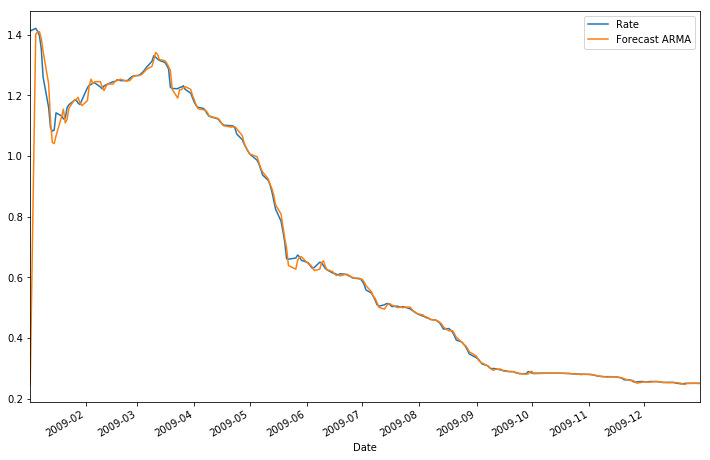

In [31]:
df_forecast[['Rate','Forecast ARMA']].plot(figsize=(12,8))

ARMA-GARCH

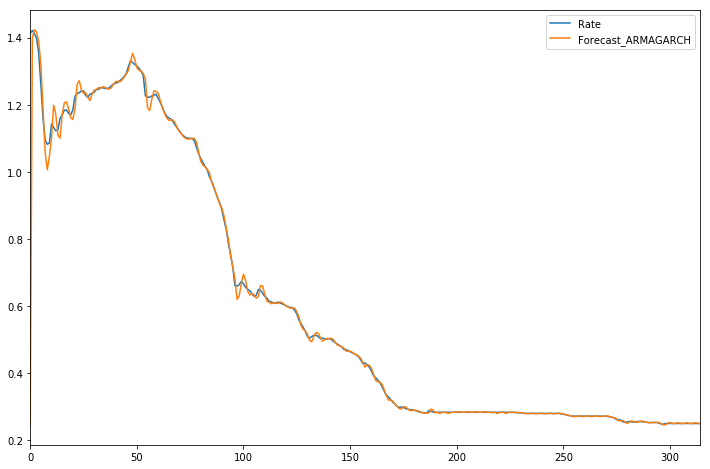

In [32]:
df_armagarch = pd.read_excel('Results\Forecast.xls',index_col='Date')
df_armagarch['Forecast_ARMAGARCH'] = np.exp(df_armagarch['Forecast'])*df_armagarch['Rate'].shift(1)
df_armagarch['Forecast_ARMAGARCH'].iloc[0] = np.exp(df_armagarch['Forecast'].iloc[0])*df['Rate'].iloc[-1]
df_forecast = df_forecast.merge(pd.DataFrame(df_armagarch),how='left')
df_forecast.drop('Forecast',axis=1,inplace=True)
df_forecast.drop('Residuals',axis=1,inplace=True)
df_forecast.to_excel('Results/Prediction 2009 (model 2007-2008).xls')
MAE_ag = np.average(np.abs(df_forecast['Rate']-df_forecast['Forecast_ARMAGARCH']))
Sum_Square_ag = (df_forecast['Rate']-df_forecast['Forecast_ARMAGARCH'])**2
RMSE_ag = np.sqrt(np.average(Sum_Square_ag))
df_forecast[['Rate','Forecast_ARMAGARCH']].plot(figsize=(12,8))

Forecast Results

In [33]:
title = ['Naive','ARMA','ARMA-Garch']
obs = [str(len(df_forecast)),str(len(df_forecast)),str(len(df_forecast))]
no1 = [RMSE_naive,RMSE_ARMA,RMSE_ag]
no2 = [MAE_naive,MAE_ARMA,MAE_ag]
result = pd.DataFrame(np.transpose([obs,no1,no2]),index=title,columns=['Number of Observations','RMSE','MAE'])
result.to_excel('Results/Forecast_Result.xls')